## Visualizing dyad
Consider an image from `skimage.data`. For simplicity, say that $X \in \mathbb{R}^{m \times n}$ is the matrix representing that image. You are asked to visualize the dyad of the SVD Decomposition of $X$ and the result of compressing the image via SVD. In particular:

* Load the image into memory and compute its SVD;
* Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?
* Plot the singular values of $X$. Do you note something?
* Visualize the $k$-rank approximation of $X$ for different values of $k$. What do you observe?
* Compute and plot the approximation error $|| X − X_k ||_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $k$.
* Plot the compression factor: $c_k = 1 − \frac{k(m+n+1)}{mn}$ for increasing values of $k$.
* Compute the value $k$ such that $c_k = 0$ (i.e. when the compressed image requires the same amount of informations of those of the uncompressed image). What is the approximation error for this value of $k$? Comment.

It is strongly recommended (but not mandatory) to consider a grey-scale image for this exercise. You can also use an image downloaded from the web. Clearly, if your image will be an RGB image, then its shape will be `(m, n, 3)`, where the last dimension corresponds to the three channels (Red, Green, and Blue). Every point discussed in the Homework has to be done on each channel separately, and then aggregated back to an RGB image.

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt 


Load the image into memory and compute its SVD;

Shape of the image: (660, 550).
U=(660, 660), s=(550,), VT=(550, 550)


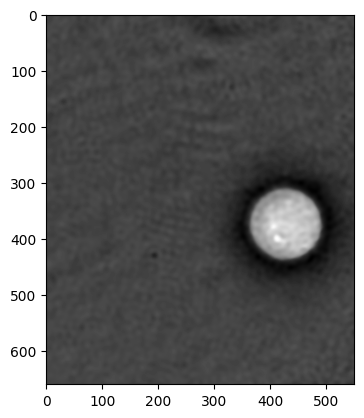

In [2]:
# Loading the image
X = skimage.data.cell()
# Printing its shape
print(f"Shape of the image: {X.shape}.")
m,n=X.shape
# Compute the SVD decomposition of X and check the shapes
U, s, VT = np.linalg.svd(X, full_matrices=True)
s_full = np.zeros((m, n))
s_full[:n, :n] = np.diag(s)
print(f'U={U.shape}, s={s.shape}, VT={VT.shape}')
plt.imshow(X, cmap='gray')
plt.show()

Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?

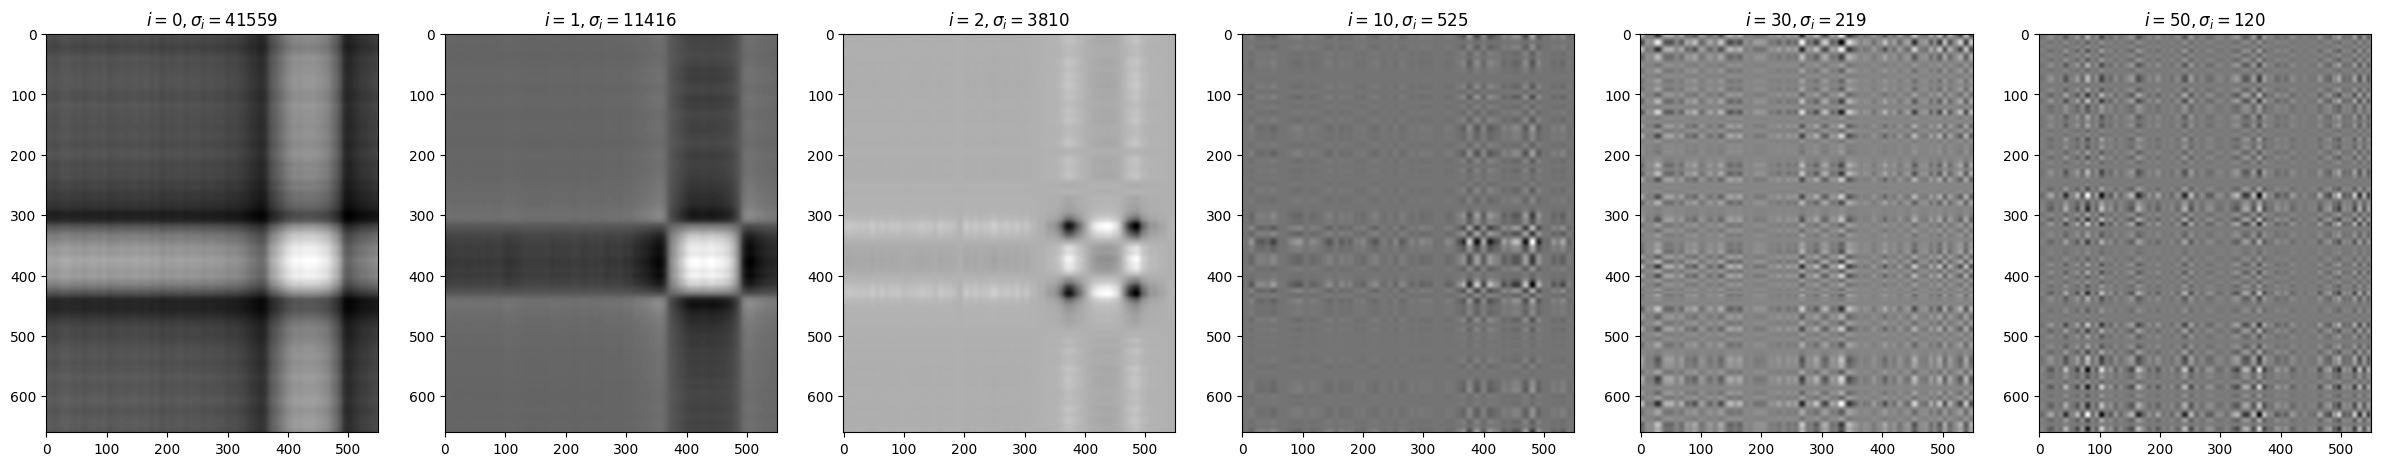

In [3]:
def dyads(i):
    u_i=U[:,i:i+1]
    s_i=s[i]
    v_i=VT.T[:,i:i+1]
    dyad= s_i * (u_i@v_i.T)
    return dyad
# Plot selected rank-1 matrices
indexes = [0,1,2, 10,30, 50]
plt.figure(figsize=(30, 20))
for idx,i in enumerate(indexes):
    res = dyads(i)
    plt.subplot(1, len(indexes), idx + 1)
    plt.title(f"$i = {i}, \\sigma_i = {s[i]:.0f}$")
    plt.imshow(res, cmap='gray')

As we can see the images clearify that dyads are less important as the index, the first two dyads contains the most information.

Plot the singular values of $X$. Do you note something?

[41558.75122262 11416.07433509  3809.58023373  1747.65955223
  1505.02681469]


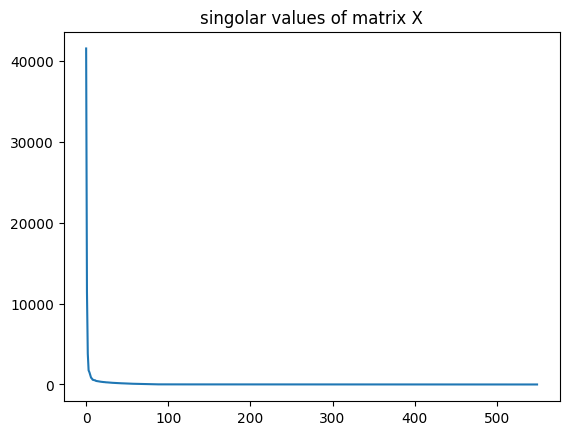

In [4]:
plt.title("singolar values of matrix X")
plt.plot(s)
print(s[:5])

Clearly here we can see that singular values decreases drastictly, so the firsts ones contain majority of the information.

Visualize the $k$-rank approximation of $X$ for different values of $k$. What do you observe?

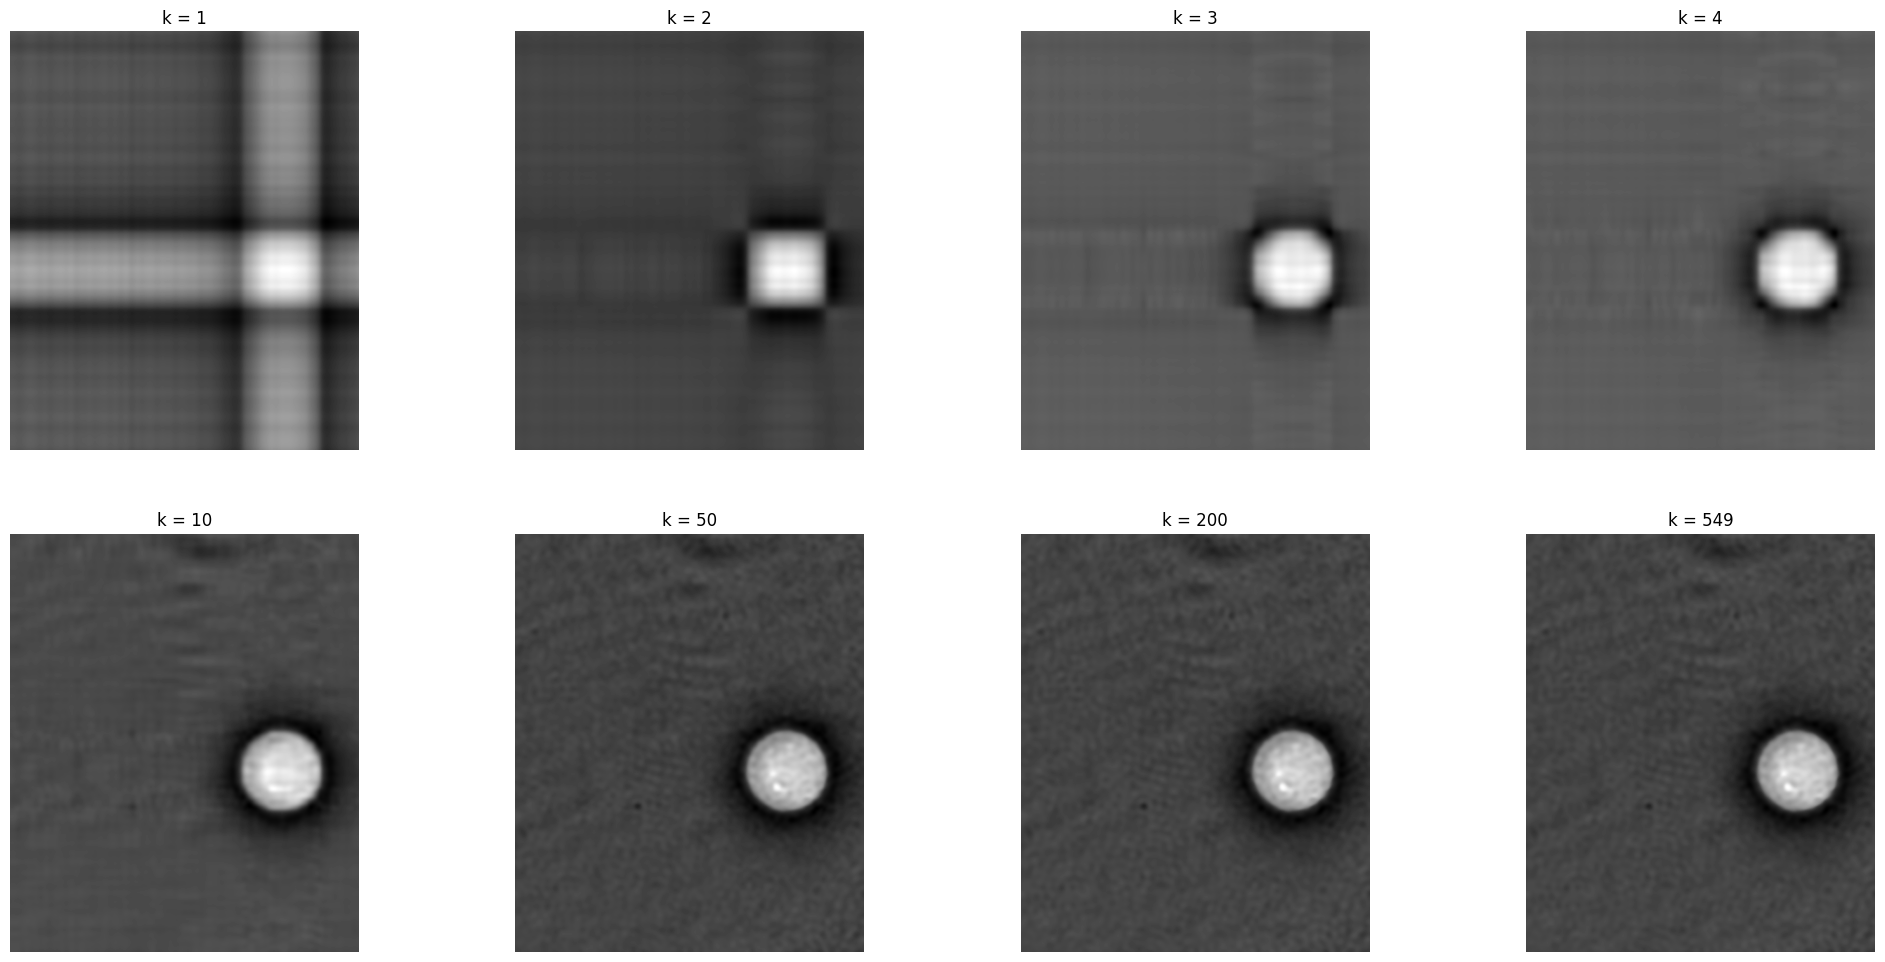

In [5]:

def k_rank_matrix(k):
    return U[:, :k] @ s_full[:k, :k] @ VT[:k, :]

# Visualization
indexes = [1,2,3,4,10,50,200,549]
plt.figure(figsize=(25,25))
for k in indexes:
    res = k_rank_matrix(k)
    plt.subplot(4,4,indexes.index(k) + 1)
    plt.title(f"k = {k}")
    plt.imshow(res, cmap='gray')
    plt.axis('off')

As we can see with K getting bigger the image gets really close to the original one, in partiuclar ak k gets bigger only small details changes, with K=50 the image is already quiet similar.

* Compute and plot the approximation error $|| X − X_k ||_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $k$.
* Plot the compression factor: $c_k = 1 − \frac{k(m+n+1)}{mn}$ for increasing values of $k$.
* Compute the value $k$ such that $c_k = 0$ (i.e. when the compressed image requires the same amount of informations of those of the uncompressed image). What is the approximation error for this value of $k$? Comment.


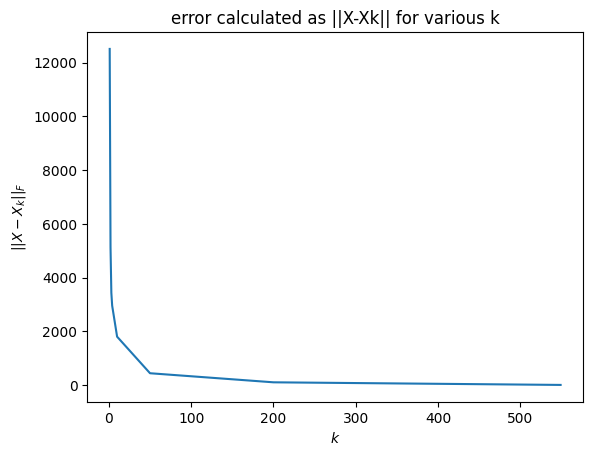

In [6]:
plt.title("error calculated as ||X-Xk|| for various k")
plt.xlabel('$k$')
plt.ylabel('$||X-X_k||_F$')
errors=[]
for k in indexes:
    k_rank=k_rank_matrix(k)
    errors.append(np.linalg.norm(X - k_rank))

plt.plot(indexes,errors)


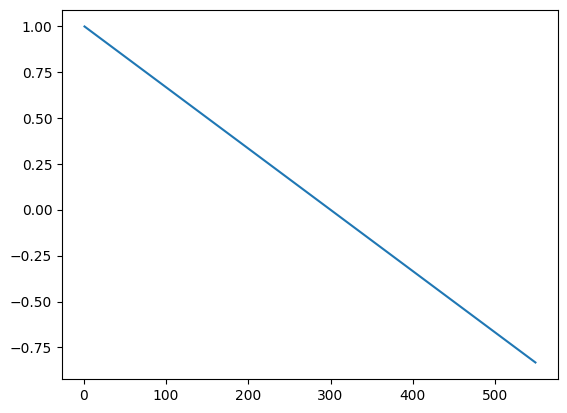

In [7]:
c_k=[]

def c_factor(k):
    return(1-(k*(m+n+1)/(m*n)))

for k in indexes:
    c_k.append(c_factor(k))

plt.plot(indexes,c_k)

In [8]:

k=int(m*n/(m+n+1))
print(k)
print(np.linalg.norm(X - k_rank_matrix(k)))

299
62.24186731943368


With k=299 the approximation error is zero so the information used in the svd is equal to the information of the original one. As we can see, the approximation error is extremely small, indicating that the dyads beyond the 299th contribute poorly to the information content of the image. However, the error is not exactly zero because we are focusing on preserving the most significant information rather than perfectly reconstructing the actual values of X. 

## Classification of MNIST Digits with SVD Decomposition.

Download the MNIST dataset from [kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer) and load it into memory by following the steps we did in the [PCA class](https://devangelista2.github.io/statistical-mathematical-methods/ML/PCA.html). When loaded into memory, this dataset appear as an array with shape $42000 \times 785$ , containining the flattened version of $42000$ $28 \times 28$ grayscale handwritten digits, plus a column representing the true class of the corresponding digit. By pre-processing the data as we did in class, you should obtain a matrix `X` containing the flattenened digits, with shape `(784, 42000)`, and a vector `Y` of the associated digit value, with a shape of `(42000,)`.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load data into memory
data = pd.read_csv('./data.csv')

# Convert data into a matrix
data = np.array(data)

X = data[:, 1:]
X = X.T
labels = X[:,0]
Y = data[:, 0]

print(f"X:{X.shape},Y:{Y.shape}")

d, N = X.shape

X:(784, 42000),Y:(42000,)


Write a function taking as input an index value `idx` and visualizes the image of `X` in the corresponding index (i.e. `X[idx, :]`). Use the function `plt.imshow`.


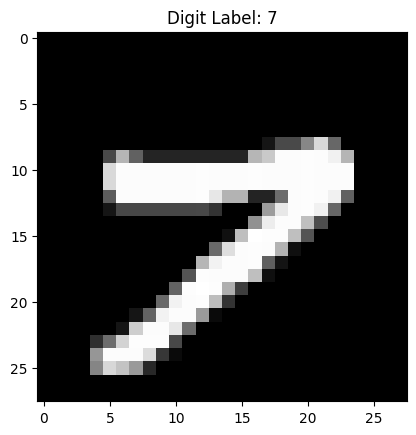

In [10]:
def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))
    plt.title(f"Digit Label: {Y[idx]}")
    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()


visualize(X,21345)


Filter from `X` only those elements that corresponds to digits 3 or 4. This can be done, for example, by using the boolean slicing of `numpy` arrays, as already discussed in class.

In [11]:
# Define the boolean array to filter out digits
filter_3or4 = (Y==3) | (Y==4)

# Define the filtered data
X_3or4 = X[:, filter_3or4]
Y_3or4 = Y[filter_3or4]

Split the obtained dataset in training and testing in a proportion of $80 : 20$. From now on, we will only consider the training set. The test set will be only used at the end of the exercise to test the algorithm.

In [12]:
def split_data(X, Y, training_percentage):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:int(N*training_percentage)]
    test_idx = idx[int(N*training_percentage):]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

# Test it
(X_train, Y_train), (X_test, Y_test) = split_data(X_3or4, Y_3or4, 0.80)

print(X_train.shape, X_test.shape)

(784, 6738) (784, 1685)


Call `X1` and `X2` the submatrices of the training set, filtered by the two selected digits, corresponding to those element associated with number 3 (class `C1`), and with number 4 (class `C2`).

In [13]:
X1=X_train[:,Y_train==3]
X2=X_train[:,Y_train==4]
print(X1.shape,X2.shape)

(784, 3468) (784, 3270)



Compute the SVD decomposition of `X1` and `X2` with `np.linalg.svd(matrix, full_matrices=False)` and denote the $U$-part of the two decompositions as `U1` and `U2`.

In [14]:
U1, s1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2, full_matrices=False)
print(U1.shape,U2.shape)

(784, 784) (784, 784)


 Take an unknown digit $x$ from the test set, and compute $x_1^\perp = U_1(U_1^T x)$ and $x_2^\perp = U_2(U_2^T x)$.

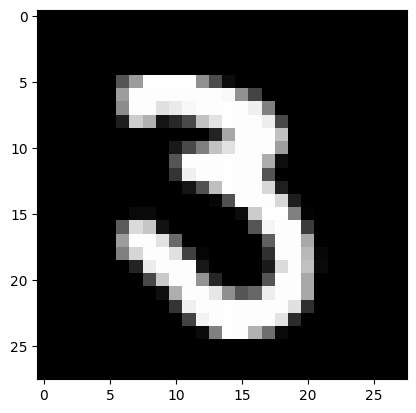

In [15]:
x=X_test[:,21]
plt.imshow(x.reshape((28,28)), cmap='gray');
x_1_projection=U1 @ (U1.T@x)
x_2_projection=U2 @ (U2.T@x)

Compute the distances $d_1 = || x − x_1^\perp ||_2$ and $d_2 = || x − x_2^\perp||_2$, and classify $x$ as $C_1$ if $d_1 < d_2$, as $C_2$ if $d_2 < d_1$.

In [16]:
d1 = np.linalg.norm(x - x_1_projection, 2)
d2 = np.linalg.norm(x - x_2_projection, 2)

if(d1<d2):
    print(f"the number is classified as 3, the real number is {Y_test[21]}")
else:
    print(f"the number is classified as 4,the real number is {Y_test[21]}")


the number is classified as 3, the real number is 3


Repeat the experiment for different values of $x$ in the test set. Compute the misclassification rate for this algorithm.

In [17]:
def compute_miscassification(X_test,Y_test,indexes,U1,U2,num1,num2):
    tot_class=0
    wrong_class=0
    for idx in indexes:
        x=X_test[:,idx]
        x_1_projection=U1 @ (U1.T@x)
        x_2_projection=U2 @ (U2.T@x)
        d1 = np.linalg.norm(x - x_1_projection, 2)
        d2 = np.linalg.norm(x - x_2_projection, 2)
        d_preview=num1 if d1 < d2 else num2
        if(d_preview!=Y_test[idx]):
            wrong_class+=1
        tot_class+=1
    misclassification_rate = wrong_class / tot_class
    return 1 - misclassification_rate  # Return accuracy

#test
indexes=np.arange(Y_test.shape[0])
accuracy=compute_miscassification(X_test,Y_test,indexes,U1,U2,3,4)
print(f"the accuracy is {accuracy*100}%")



the accuracy is 93.64985163204747%


   * Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error?
   * Comment the obtained results.

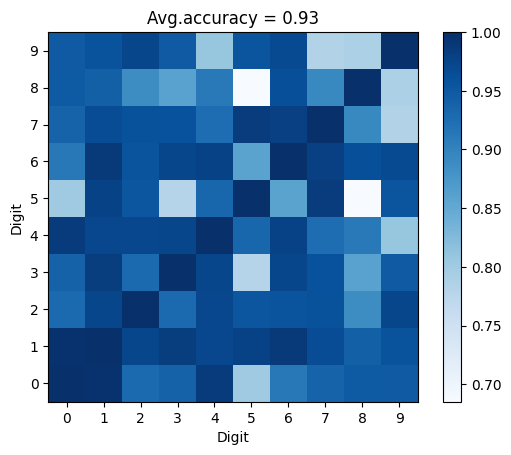

In [18]:
matrix_accuracy = np.zeros((10, 10))
SVDS = {}

# compute the split data and the SVD for each number of the dataset
for i in range(10):
    filter_i = (Y == i)
    X_i = X[:, filter_i]
    Y_i = Y[filter_i]
    (X_train, Y_train), (X_test, Y_test) = split_data(X_i, Y_i, 0.80)
    U1, s1, VT1 = np.linalg.svd(X_train, full_matrices=False)
    SVDS[i] = {
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test,
        'U1': U1
    }


#double iteration to check all the pairs
for i in range(10):
    for j in range(10):
        # Get the test data and labels for each pair
        X_test_i = SVDS[i]['X_test']
        X_test_j = SVDS[j]['X_test']
        Y_test_i = SVDS[i]['Y_test']
        Y_test_j = SVDS[j]['Y_test']
        U1_i=SVDS[i]['U1']
        U1_j=SVDS[j]['U1']
        # Concatenate the tests and labels in order to evaluate for all the numbers a single time
        X_test_combined = np.concatenate((X_test_i, X_test_j), axis=1)
        Y_test_combined = np.concatenate((Y_test_i, Y_test_j))  # Concatenate labels
        
        # Get the total number of data to evaluate all of them
        indexes_combined = np.arange(X_test_combined.shape[1])
        # Compute athe accuracy for the couple of digits
        accuracy_i = compute_miscassification(X_test_combined,Y_test_combined, indexes_combined, U1_i, U1_j, i, j)
        # Compute the accuracy
        matrix_accuracy[i, j] = accuracy_i  


# Plot the 2D array of the accuracies for every couple of digits
plt.imshow(matrix_accuracy, cmap='Blues', interpolation='nearest')
plt.xlabel('Digit')
plt.ylabel('Digit')
plt.gca().invert_yaxis()  # Invert y-axis for correct display
plt.colorbar()
plt.title('Avg.accuracy = {:.2f}'.format(np.mean(matrix_accuracy))) #calculate the all average accuracy
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

As we can see digits like 5 and 3, 8 and 5 have the lowest accuracy since they are quite similar in distribution of the pixels and the distance of the projection can be missed.

The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than 2 classes (say, $k$ different classes) $C_1, \dots, C_k$, we just need to repeat the same procedure as before for each matrix $X_1, \dots, X_k$ to obtain the distances $d_1, \dots, d_k$. Then, the new digit $x$ from the test set will be classified as $C_i$ if $d_i$ is lower that $d_j$ for each $j = 1,...,k$. Repeat the exercise above with a 3-digit example. Comment the differences.

In [19]:
from itertools import combinations
import pandas as pd
#3 digits experiment (i will create a function that can classify 3- digits)
num1,num2,num3=5,8,9
def compute_miscassification(X_test, Y_test, indexes, U1, U2, U3, num1, num2, num3):
    tot_class = 0
    wrong_class = 0

    for idx in indexes:
        x = X_test[:, idx]
        # Projections onto the subspaces defined by U1, U2, U3
        x_1_projection = U1 @ (U1.T @ x)
        x_2_projection = U2 @ (U2.T @ x)
        x_3_projection = U3 @ (U3.T @ x)

        # Distances to the projections
        d1 = np.linalg.norm(x - x_1_projection, 2)
        d2 = np.linalg.norm(x - x_2_projection, 2)
        d3 = np.linalg.norm(x - x_3_projection, 2)

        # Determine the closest subspace
        if d1 < d2 and d1 < d3:
            d_preview = num1
        elif d2 < d1 and d2 < d3:
            d_preview = num2
        else:
            d_preview = num3

        # Check if the prediction matches the actual label
        if d_preview != Y_test[idx]:
            wrong_class += 1
        tot_class += 1

    # Calculate the accuracy
    misclassification_rate = wrong_class / tot_class
    return 1 - misclassification_rate  # Return accuracy
SVDS={}
for i in range(10):
    filter_i = (Y == i)
    X_i = X[:, filter_i]
    Y_i = Y[filter_i]
    (X_train, Y_train), (X_test, Y_test) = split_data(X_i, Y_i, 0.80)
    U1, s1, VT1 = np.linalg.svd(X_train, full_matrices=False)
    SVDS[i] = {
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test,
        'U1': U1 }
    
# now i evaluates all the 3 triplets to find the best and worst one
results = []
for num1, num2, num3 in combinations(range(10), 3):
    # Combine test data and labels for the triple
    X_test_combined = np.concatenate((SVDS[num1]['X_test'], SVDS[num2]['X_test'], SVDS[num3]['X_test']), axis=1)
    Y_test_combined = np.concatenate((SVDS[num1]['Y_test'], SVDS[num2]['Y_test'], SVDS[num3]['Y_test']))
    # Get indexes of combined data
    indexes_combined = np.arange(X_test_combined.shape[1])
    accuracy = compute_miscassification(
        X_test_combined, Y_test_combined, indexes_combined, 
        SVDS[num1]['U1'], SVDS[num2]['U1'], SVDS[num3]['U1'], num1, num2, num3
    )
    results.append((num1, num2, num3, accuracy))


results_df = pd.DataFrame(results, columns=['Digit1', 'Digit2', 'Digit3', 'Accuracy'])

# Find the best and worst similar triples
most_similar = results_df.loc[results_df['Accuracy'].idxmax()]
least_similar = results_df.loc[results_df['Accuracy'].idxmin()]


print("Most similar triple:")
print(most_similar)

print("Least similar triple:")
print(least_similar)


Most similar triple:
Digit1      1.000000
Digit2      5.000000
Digit3      7.000000
Accuracy    0.980986
Name: 55, dtype: float64
Least similar triple:
Digit1      4.000000
Digit2      7.000000
Digit3      9.000000
Accuracy    0.570639
Name: 108, dtype: float64


## Clustering with PCA
Load and pre-process the dataset as did in the previous exercise, to get the matrix `X` with shape `(784, 42000)`, and the associated vector `Y`.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load data into memory
data = pd.read_csv('./data.csv')

# Convert data into a matrix
data = np.array(data)

X = data[:, 1:]
X = X.T
labels = X[:,0]
Y = data[:, 0]

print(f"X:{X.shape},Y:{Y.shape}")

#for the last point
X_tot = data[:, 1:]
X_tot = X_tot.T
Y_tot = data[:, 0]


X:(784, 42000),Y:(42000,)


Choose a number of digits (for example, 0, 6 and 9) and extract from `X` and `Y` the sub-dataset containing only the considered digits, as did in the previous exercise.

In [21]:
# Define the boolean array to filter out digits
filter_0_6_9 = (Y==0) | (Y==6) | (Y==9)

# Define the filtered data
X = X[:, filter_0_6_9]
Y = Y[filter_0_6_9]
d,N=X.shape


Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from  `X` and `Y`. Call them `X_train` and `Y_train`. Everything else is the test set. Call them `X_test` and `Y_test`, correspondingly. This has to be done **after** filtering out the selected digits from `X` and `Y`.

In [22]:
def split_data(X, Y, N_train):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)
n_train=10000
(X_train, Y_train), (X_test, Y_test) = split_data(X, Y,n_train)
print(X_train.shape, X_test.shape)

(784, 10000) (784, 2457)


Implement the algorithms computing the PCA of `X_train` with a fixed value of $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster. The clusters are identified by projecting `X_train` via PCA to its low-dimension version `Z_train`, and then splitting it into sets (say, `Z1`, `Z2`, `Z3`) based on the digit that was represented in that position before the PCA projection. Each set `Z1`, `Z2`, `Z3` represents a cluster, of which we can easily compute the centroid

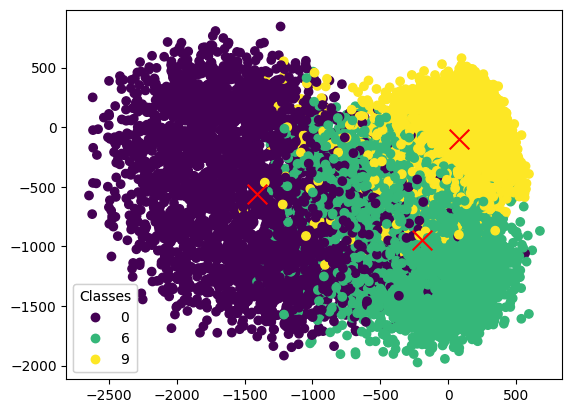

In [23]:
def centroid(X):
    return np.mean(X, axis=1)
    
def pca_with_clusters(X_train,X, k):
   
    cX = centroid(X_train)

    # Make it a column vector
    cX = np.reshape(cX, (d, 1))

    # Center the data
    Xc = X_train - cX

    # Compute SVD decomposition
    U, s, VT = np.linalg.svd(Xc, full_matrices=False)

    Uk = U[:, :k]

    # Define projection matrix
    P = Uk.T

    # Project X_train -> Z_train
    Z_train = P @ X_train

    return Z_train,P
    
k=2
Z_train,Projection_matrix = pca_with_clusters(X_train,X, k)

#plotting the scatter plot
Z1=Z_train[:,Y_train==0]
Z2=Z_train[:,Y_train==6]
Z3=Z_train[:,Y_train==9]
Z_k_1_centroid = centroid(Z1)
Z_k_2_centroid = centroid(Z2)
Z_k_3_centroid = centroid(Z3)

XX = [Z_k_1_centroid[0], Z_k_2_centroid[0], Z_k_3_centroid[0]]
YY = [Z_k_1_centroid[1], Z_k_2_centroid[1], Z_k_3_centroid[1]]

fig, ax = plt.subplots()
# Plotting the projected dataset
scatter = ax.scatter(Z_train[0, :], Z_train[1, :], c=Y_train,label='Data Points')
legend1 = ax.legend(*scatter.legend_elements(),
                   loc="lower left", title="Classes")
ax.add_artist(legend1)
ax.scatter(XX,YY,marker='x',color='red',s=200)
plt.show()

Compute, for each cluster, the average distance from its centroid. Which property of PCA projection does this quantity measure?

In [24]:
print(f"Average distance from centroid in cluster 1: {np.mean(np.linalg.norm((Z1.T-Z_k_1_centroid).T, axis=0))}")
print(f"Average distance from centroid in cluster 2: {np.mean(np.linalg.norm((Z2.T-Z_k_2_centroid).T, axis=0))}")
print(f"Average distance from centroid in cluster 3: {np.mean(np.linalg.norm((Z3.T-Z_k_3_centroid).T, axis=0))}")

Average distance from centroid in cluster 1: 726.3157260331303
Average distance from centroid in cluster 2: 528.5770983725323
Average distance from centroid in cluster 3: 359.3911162103673


By keeping the **same** projection matrix `P` from the train set, project the test set `X_test` on the low-dimensional space.

In [25]:
# Project X_test -> Z_test
Z_test = Projection_matrix @ X_test
print("Shape of Z_test:", Z_test.shape)

Shape of Z_test: (2, 2457)


Consider the clusters in `X_test` by considering the informations on `Y_test`, similarly to what we did on the previous point. Consider the centroids computed from the training set. For each cluster in the test set, compute the average distance to the corresponding centroid (from the train set). Comment the results;

In [26]:

Z_k_1_test = Z_test[:,Y_test == 0]
Z_k_2_test = Z_test[:,Y_test == 6]
Z_k_3_test = Z_test[:,Y_test == 9]

Z_k_1_centroid_test = centroid(Z_k_1_test)
Z_k_2_centroid_test = centroid(Z_k_2_test)
Z_k_3_centroid_test = centroid(Z_k_3_test)

print(f"Average distance from centroid in cluster 1: {np.mean(np.linalg.norm((Z_k_1_test.T-Z_k_1_centroid_test).T, axis=0))}")
print(f"Average distance from centroid in cluster 2: {np.mean(np.linalg.norm((Z_k_2_test.T-Z_k_2_centroid_test).T, axis=0))}")
print(f"Average distance from centroid in cluster 3: {np.mean(np.linalg.norm((Z_k_3_test.T-Z_k_3_centroid_test).T, axis=0))}")

Average distance from centroid in cluster 1: 734.1746253417056
Average distance from centroid in cluster 2: 543.7325854460271
Average distance from centroid in cluster 3: 344.42529286788715


As results evidence the distance from the centroid is quite similar between train and test set.

 Define a classification algorithm in this way: given a new observation `x`, compute the distance between `x` and each cluster centroid computed on the training set. Assign `x` to the class corresponding the the closer centroid. Compute the misclassification rate of this algorithm on the test set;

In [27]:
# Returns the index of the closest centroid
def classification(x, c1, c2, c3):
    d1 = np.linalg.norm(x-c1,2)
    d2 = np.linalg.norm(x-c2,2)
    d3 = np.linalg.norm(x-c3,2)

    return [d1,d2,d3].index(min([d1,d2,d3]))

correct = 0

# Classify the training data
correct += np.sum([classification(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 0 for x in Z_k_1_test.T])
correct += np.sum([classification(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 1 for x in Z_k_2_test.T])
correct += np.sum([classification(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 2 for x in Z_k_3_test.T])

print(f"Algorithm accuracy {correct / (len(Z_k_1_test.T) + len(Z_k_2_test.T) + len(Z_k_3_test.T))*100} %")

Algorithm accuracy 84.98168498168498 %


* Repeat this experiment for different values of $k$ and different digits. What do you observe?

accuracy [4, 7, 9]:'0.8598271326568959
accuracy [1, 5, 7]:'0.9357638888888888


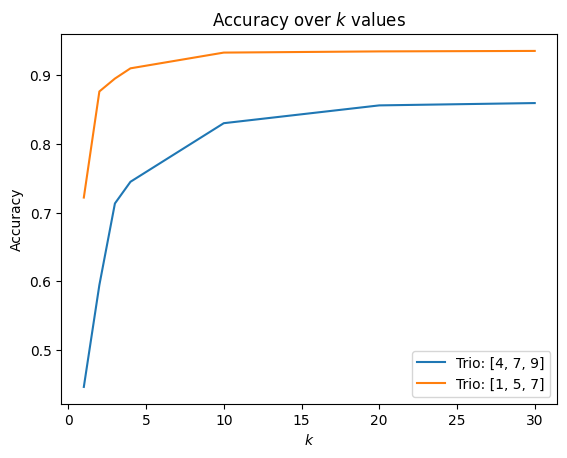

In [29]:

kk = [1,2,3,4,10,20,30]
digits=[4,7,9],[1,5,7]

for trio in digits:
    accuracies = []
    # Define the boolean array to filter out digits
    filter = (Y_tot==trio[0]) | (Y_tot==trio[1]) | (Y_tot==trio[2])
    # Define the filtered data
    X = X_tot[:, filter]
    Y = Y_tot[filter]
    (X_train, Y_train), (X_test, Y_test) = split_data(X, Y,10000)
    for k in kk:
        
        Z_train, P = pca_with_clusters(X_train, X, k)
        Z_test = P @ X_test

        Z_k_1_test = Z_test[:, Y_test == trio[0]]
        Z_k_2_test = Z_test[:, Y_test == trio[1]]
        Z_k_3_test = Z_test[:, Y_test == trio[2]]

        Z_k_1_centroid_test = centroid(Z_k_1_test)
        Z_k_2_centroid_test = centroid(Z_k_2_test)
        Z_k_3_centroid_test = centroid(Z_k_3_test)

        correct = 0
        correct += np.sum([classification(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 0 for x in Z_k_1_test.T])
        correct += np.sum([classification(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 1 for x in Z_k_2_test.T])
        correct += np.sum([classification(x, Z_k_1_centroid_test, Z_k_2_centroid_test, Z_k_3_centroid_test) == 2 for x in Z_k_3_test.T])

        accuracy = correct / (len(Z_k_1_test.T) + len(Z_k_2_test.T) + len(Z_k_3_test.T))
        accuracies.append(accuracy)


    print(f"accuracy {trio}:'{accuracies[-1]}")
    plt.plot(kk,accuracies, label=f'Trio: {trio}')
    plt.title('Accuracy over $k$ values')
    plt.xlabel('$k$')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.plot();



As we can  se from the graph, as we raise k, for the firsts k, we see that the result gets better, after that the accuracy does not increase monotonically because of SVD and the importance of singular values that decreases drastically


Compare this classification algorithm with the one defined in the previous exercise. Which performs better?

Comparing the the 2 classification alghoritm we can see that PCA has better performance overall, with high different digits like 1 5 7 PCA seems to not improve largly but with 4 7 9 the PCA has obtained a great improvement of ratio in comparison to the previous technique.